In [7]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore specific warning
warnings.filterwarnings("ignore")

In [14]:
df = pd.read_csv('personal_banking_customer_segmentation.csv')

In [4]:
print("First five row of the dataset")
print(df.head())

First five row of the dataset
   CustomerID  Age  Gender  IncomeLevel     Occupation GeographicLocation  \
0           1   56    Male       129952  Self-Employed               West   
1           2   69  Female        74235   Professional              South   
2           3   46  Female        78565  Self-Employed               East   
3           4   32  Female        75342  Self-Employed               East   
4           5   60    Male        62723        Student              North   

  AccountType  NumberOfAccounts  AverageBalance  TransactionVolume  ...  \
0     Savings                 1           26443                157  ...   
1     Savings                 2            2382                369  ...   
2     Savings                 2           20998                200  ...   
3    Checking                 2           28438                 19  ...   
4    Checking                 2           24479                214  ...   

   ChannelUsage  EngagementFrequency ServiceUsage  Reven

In [5]:
# Basic information about the dataset
print("Basic information about the dataset")
print(df.info())

Basic information about the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            10000 non-null  int64  
 1   Age                   10000 non-null  int64  
 2   Gender                10000 non-null  object 
 3   IncomeLevel           10000 non-null  int64  
 4   Occupation            10000 non-null  object 
 5   GeographicLocation    10000 non-null  object 
 6   AccountType           10000 non-null  object 
 7   NumberOfAccounts      10000 non-null  int64  
 8   AverageBalance        10000 non-null  int64  
 9   TransactionVolume     10000 non-null  int64  
 10  DepositPatterns       10000 non-null  int64  
 11  SpendingPatterns      10000 non-null  int64  
 12  ChannelUsage          10000 non-null  object 
 13  EngagementFrequency   10000 non-null  int64  
 14  ServiceUsage          10000 non-nul

In [6]:
# Checking missing values
df.isna().sum()

CustomerID              0
Age                     0
Gender                  0
IncomeLevel             0
Occupation              0
GeographicLocation      0
AccountType             0
NumberOfAccounts        0
AverageBalance          0
TransactionVolume       0
DepositPatterns         0
SpendingPatterns        0
ChannelUsage            0
EngagementFrequency     0
ServiceUsage            0
RevenueContribution     0
CostToServe             0
LifetimeValue           0
ChurnRate               0
CreditScore             0
LoanRepaymentHistory    0
DebtToIncomeRatio       0
dtype: int64

In [7]:
# Checking duplicate rows
df.duplicated().sum()

0

In [8]:
# Feature Engineering

# 1. Age group
df["AgeGroup"] = pd.cut(df["Age"], bins=[18, 30, 40, 50, 60, 70], labels=['18-30', '31-40', '41-50', '51-60', '61-70'])

# 2. Income Level Group
df['IncomeGroup'] = pd.cut(df['IncomeLevel'], bins=[20000, 40000, 60000, 80000, 100000, 150000],
                           labels=['20K-40K', '40K-60K', '60K-80K', '80K-100K', '100K-150K'])

# 3. High Value Customer (based on Lifetime Value)
df['HighValueCustomer'] = df['LifetimeValue'] > df['LifetimeValue'].median()

# 4. Transaction to Balance Ratio
df['TransactionToBalanceRatio'] = df['TransactionVolume'] / df['AverageBalance']

# 5. Debt to Income Category
df['DebtToIncomeCategory'] = pd.cut(df['DebtToIncomeRatio'], bins=[0, 0.2, 0.4, 0.6, 0.8, 1], labels=['0-20%', '21-40%', '41-60%', '61-80%', '81-100%'])

# 6. Churn Risk Category
df['ChurnRiskCategory'] = pd.cut(df['ChurnRate'], bins=[0, 0.2, 0.4, 0.6, 0.8, 1], labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

In [9]:
# Display the first few rows of the dataset with new features
print("Dataset with new features:")
print(df.head())

Dataset with new features:
   CustomerID  Age  Gender  IncomeLevel     Occupation GeographicLocation  \
0           1   56    Male       129952  Self-Employed               West   
1           2   69  Female        74235   Professional              South   
2           3   46  Female        78565  Self-Employed               East   
3           4   32  Female        75342  Self-Employed               East   
4           5   60    Male        62723        Student              North   

  AccountType  NumberOfAccounts  AverageBalance  TransactionVolume  ...  \
0     Savings                 1           26443                157  ...   
1     Savings                 2            2382                369  ...   
2     Savings                 2           20998                200  ...   
3    Checking                 2           28438                 19  ...   
4    Checking                 2           24479                214  ...   

   ChurnRate  CreditScore LoanRepaymentHistory  DebtToIncom

In [10]:
# Save the dataset with new features
feature_engineered_file_path = 'personal_banking_customer_feature_engineered.csv'
df.to_csv(feature_engineered_file_path, index=False)

feature_engineered_file_path

'personal_banking_customer_feature_engineered.csv'

In [11]:
# EDA
print(df.describe())

        CustomerID           Age    IncomeLevel  NumberOfAccounts  \
count  10000.00000  10000.000000   10000.000000      10000.000000   
mean    5000.50000     43.539400   84663.394600          2.490000   
std     2886.89568     14.911636   37671.632977          1.118135   
min        1.00000     18.000000   20018.000000          1.000000   
25%     2500.75000     31.000000   51280.000000          1.000000   
50%     5000.50000     43.000000   84912.500000          2.000000   
75%     7500.25000     56.000000  117105.250000          3.000000   
max    10000.00000     69.000000  149985.000000          4.000000   

       AverageBalance  TransactionVolume  DepositPatterns  SpendingPatterns  \
count    10000.000000       10000.000000     10000.000000       10000.00000   
mean     25349.261900         252.870100      5091.834900        5091.39200   
std      14123.546824         141.999439      2875.272016        2857.02876   
min       1004.000000           5.000000       100.000000     

In [12]:
# Summary statistics for categorical columns
print("\nSummary statistics for categorical columns:")
print(df.describe(include=['object']))


Summary statistics for categorical columns:
        Gender  Occupation GeographicLocation AccountType ChannelUsage  \
count    10000       10000              10000       10000        10000   
unique       2           5                  5           2            3   
top     Female  Unemployed               West    Checking       Online   
freq      5022        2102               2047        5095         3423   

       ServiceUsage LoanRepaymentHistory  
count         10000                10000  
unique            2                    3  
top             Yes              Average  
freq           5029                 3359  


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data Distributions
# Function to plot distributions
def plot_distributions(df, columns, n_cols=3):
    n_rows = (len(columns) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))
    axes = axes.flatten()
    
    for ax, col in zip(axes, columns):
        sns.histplot(df[col].dropna(), kde=True, ax=ax)
        ax.set_title(f'Distribution of {col}')
        
    plt.tight_layout()
    plt.show()

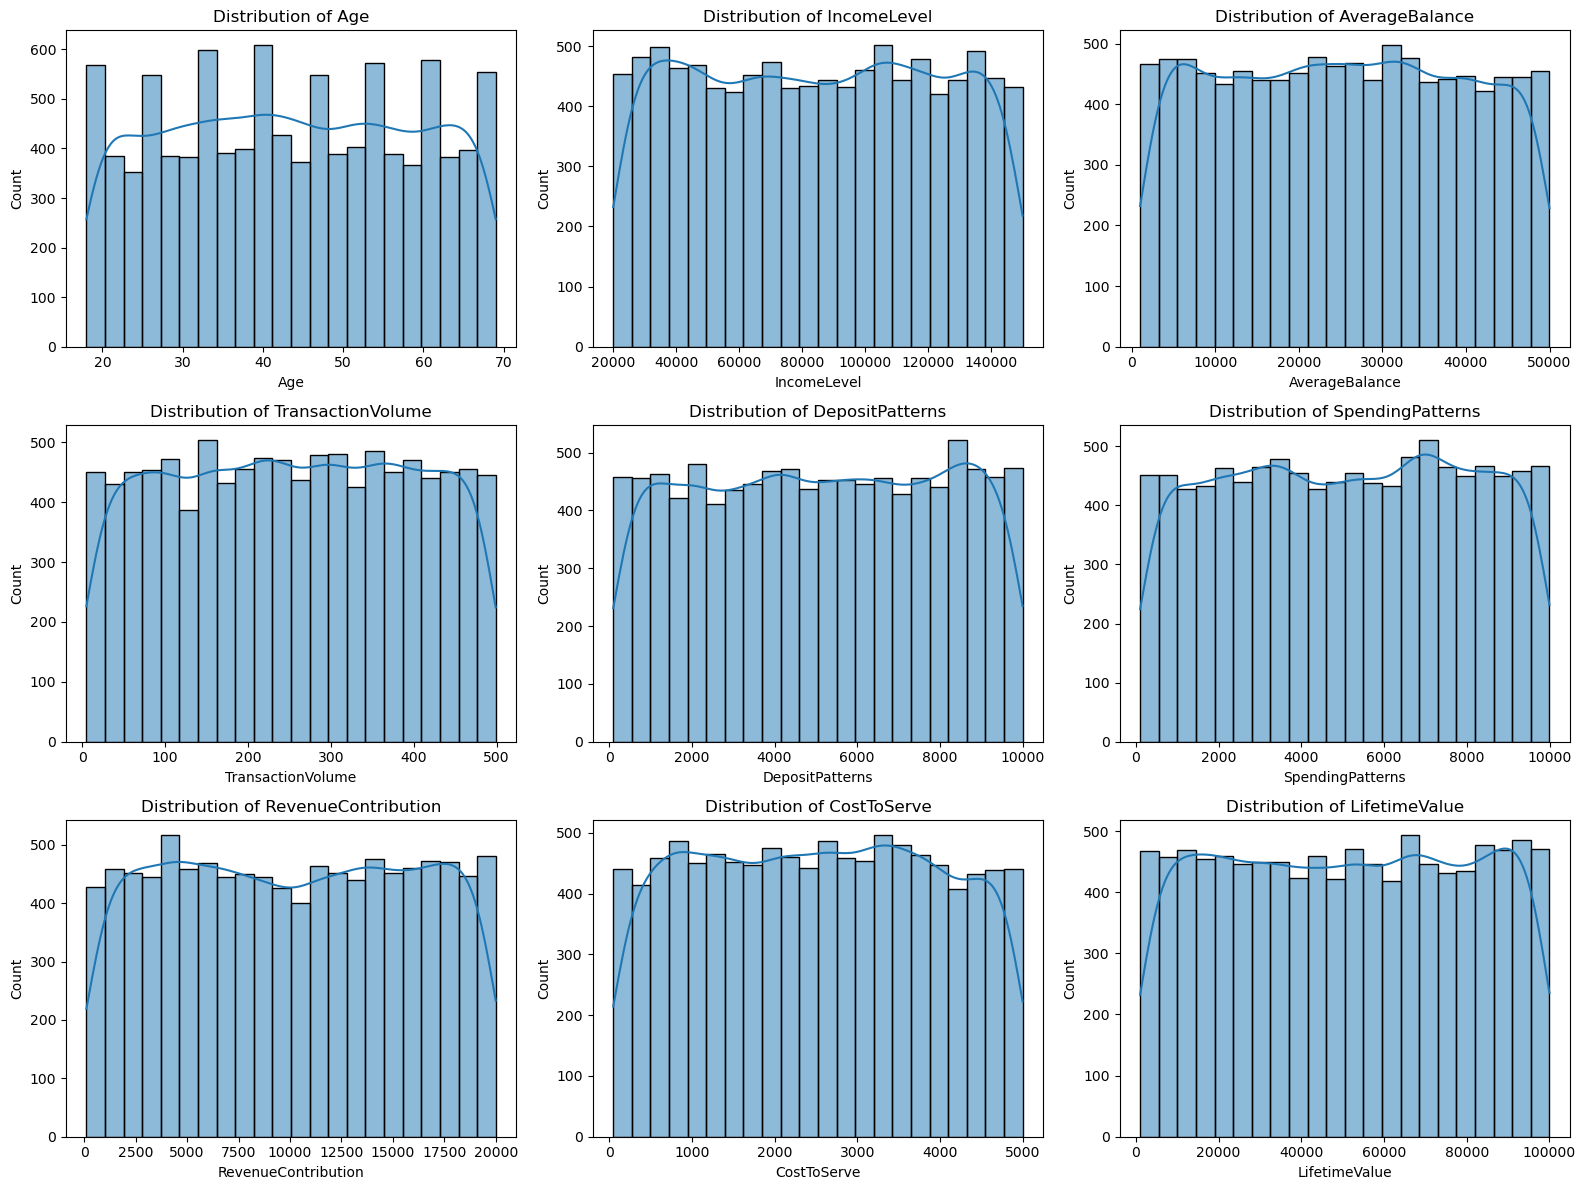

In [16]:
# Plot distributions of selected numerical features
numerical_cols = ['Age', 'IncomeLevel', 'AverageBalance', 'TransactionVolume', 'DepositPatterns', 'SpendingPatterns', 'RevenueContribution', 'CostToServe', 'LifetimeValue']
plot_distributions(df, numerical_cols)

In [3]:
import pandas as pd
df_featured = pd.read_csv("personal_banking_customer_feature_engineered.csv")

In [4]:
df_featured.columns

Index(['CustomerID', 'Age', 'Gender', 'IncomeLevel', 'Occupation',
       'GeographicLocation', 'AccountType', 'NumberOfAccounts',
       'AverageBalance', 'TransactionVolume', 'DepositPatterns',
       'SpendingPatterns', 'ChannelUsage', 'EngagementFrequency',
       'ServiceUsage', 'RevenueContribution', 'CostToServe', 'LifetimeValue',
       'ChurnRate', 'CreditScore', 'LoanRepaymentHistory', 'DebtToIncomeRatio',
       'AgeGroup', 'IncomeGroup', 'HighValueCustomer',
       'TransactionToBalanceRatio', 'DebtToIncomeCategory',
       'ChurnRiskCategory'],
      dtype='object')

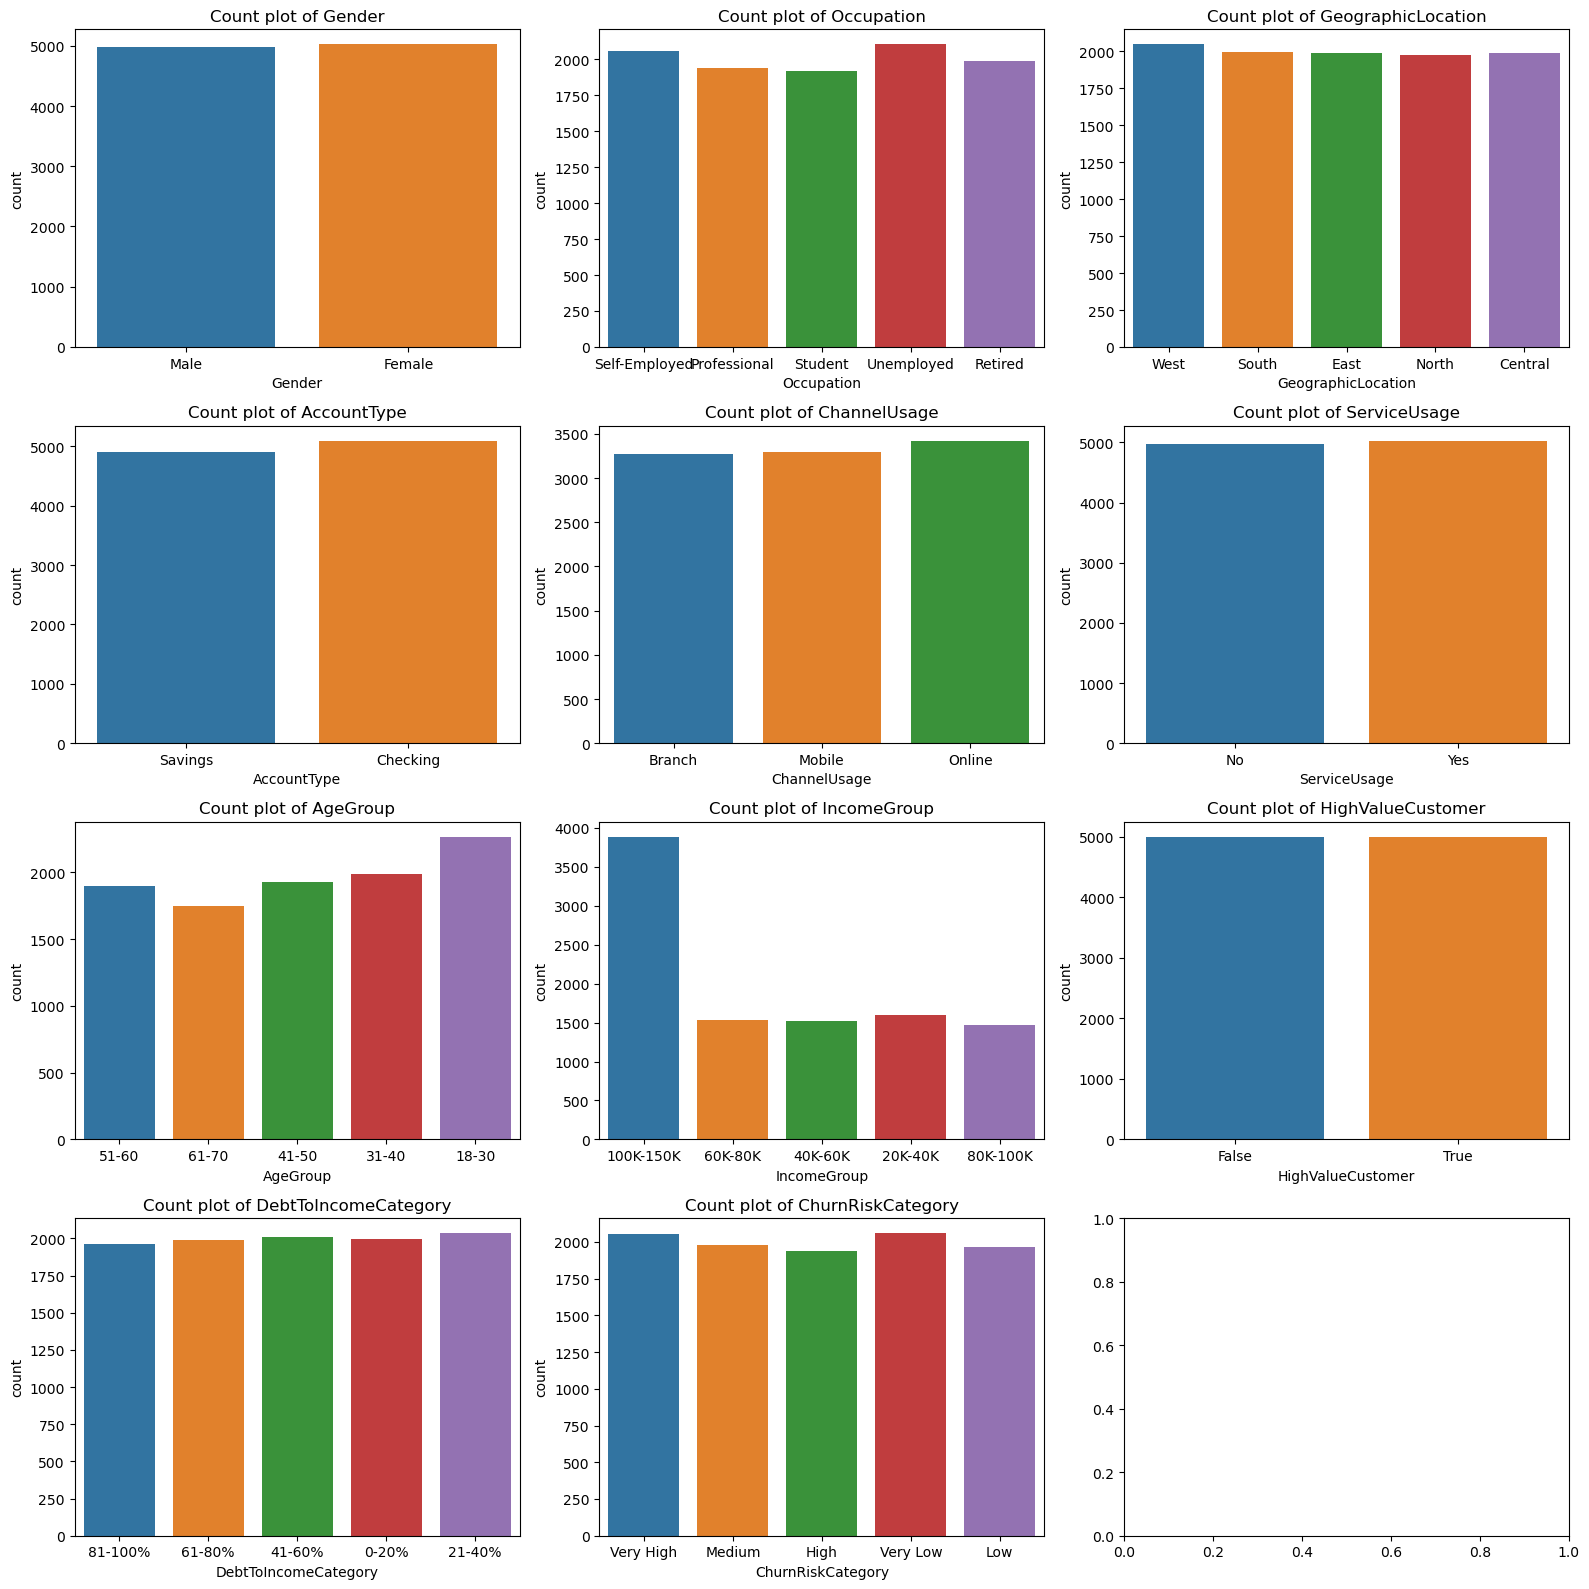

In [8]:
# Categorical Data Analysis
# Function to plot count plots with error handling
def plot_count_plots(df, columns, n_cols=3):
    n_rows = (len(columns) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))
    axes = axes.flatten()
    
    for ax, col in zip(axes, columns):
        if col in df.columns:
            sns.countplot(x=col, data=df, ax=ax)
            ax.set_title(f'Count plot of {col}')
        else:
            ax.set_visible(False)
            print(f"Warning: Column '{col}' not found in the dataframe.")
        
    plt.tight_layout()
    plt.show()

# Plot count plots of selected categorical features
categorical_cols = ['Gender', 'Occupation', 'GeographicLocation', 'AccountType', 'ChannelUsage', 'ServiceUsage', 'AgeGroup', 'IncomeGroup', 'HighValueCustomer', 'DebtToIncomeCategory', 'ChurnRiskCategory']
plot_count_plots(df_featured, categorical_cols)

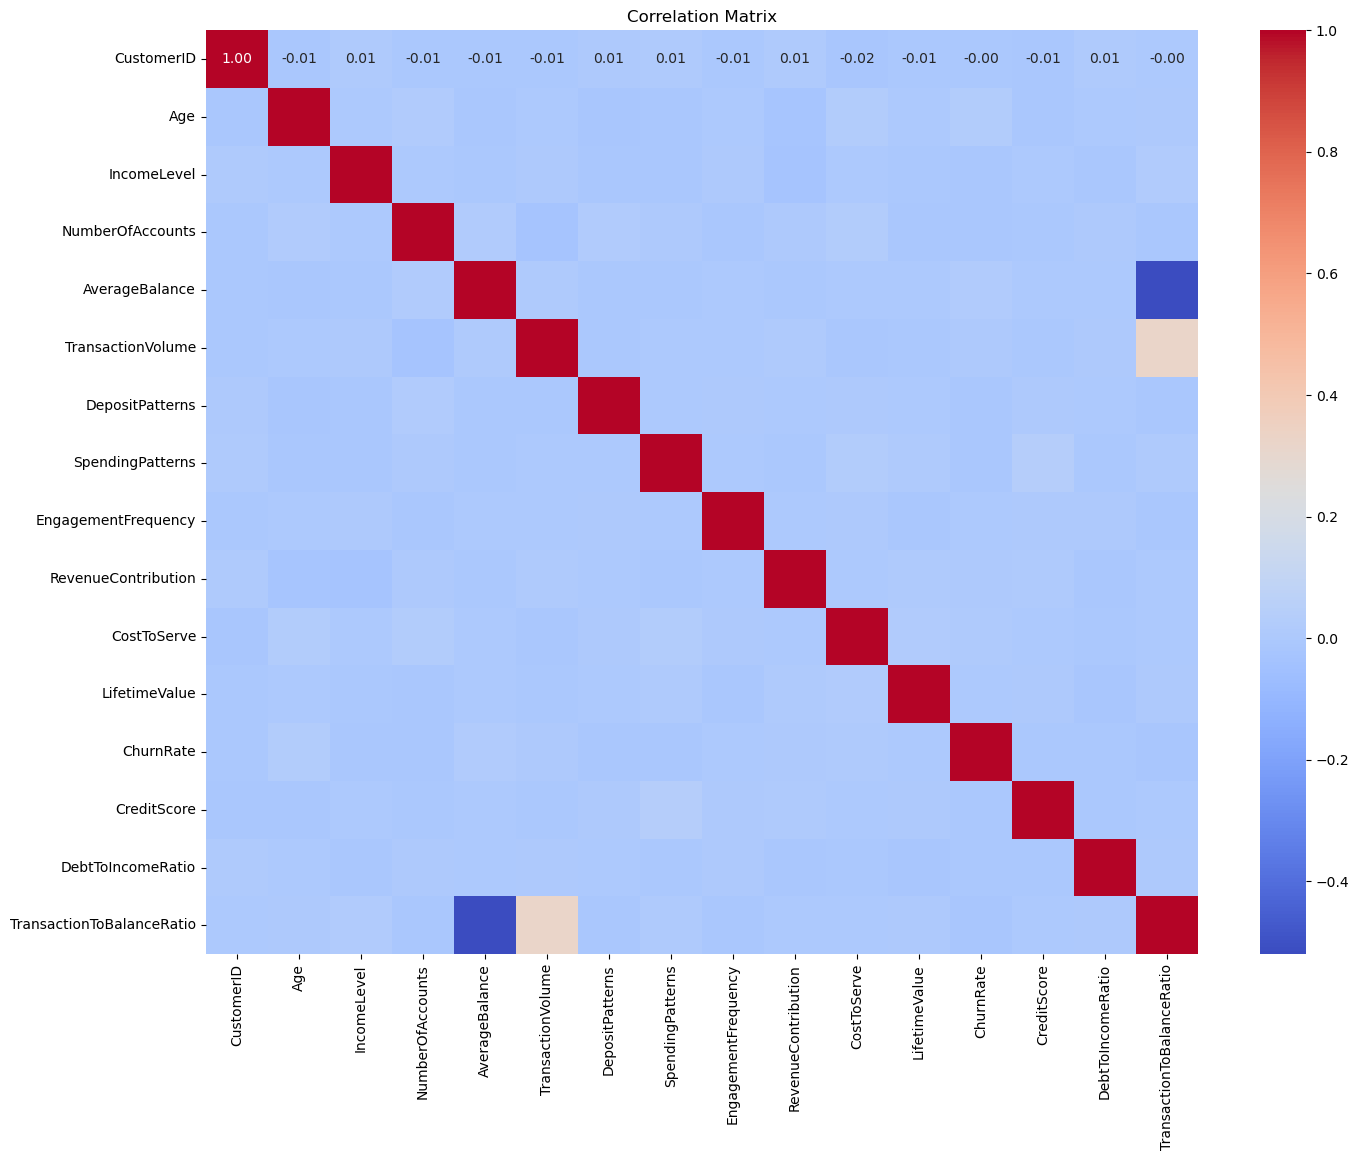

In [9]:
import numpy as np
# Correlation Analysis
# Select only numeric columns for correlation

numeric_df = df_featured.select_dtypes(include=[np.number])

# Correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

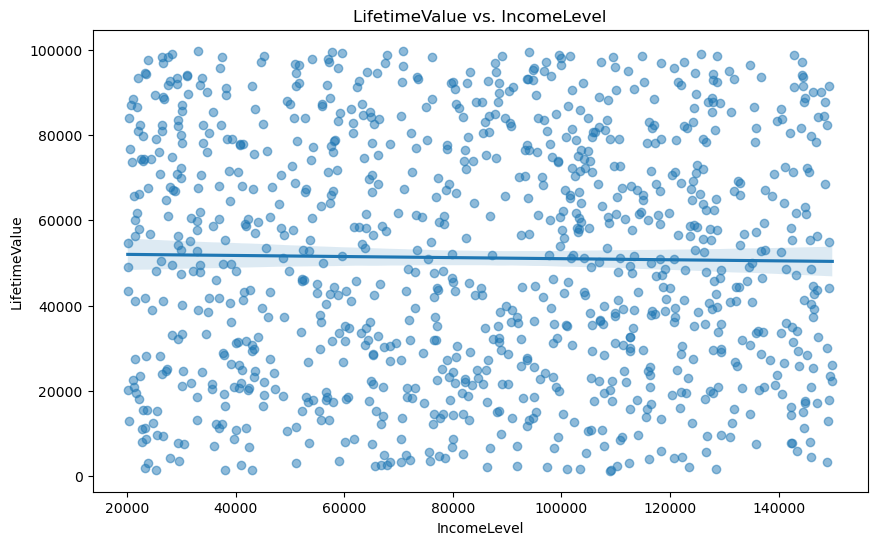

In [14]:
# Relationship Analysis with Regression Line and Transparency
# Function to create scatter plot with regression line and transparency
def plot_scatter_with_regression(df_featured, x, y, sample_size=1000, alpha=0.5):
    sample_df = df_featured.sample(n=sample_size, random_state=1)
    plt.figure(figsize=(10, 6))
    sns.regplot(x=x, y=y, data=sample_df, scatter_kws={'alpha':alpha})
    plt.title(f'{y} vs. {x}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

# Scatter plot: LifetimeValue vs. IncomeLevel
plot_scatter_with_regression(df_featured, 'IncomeLevel', 'LifetimeValue')

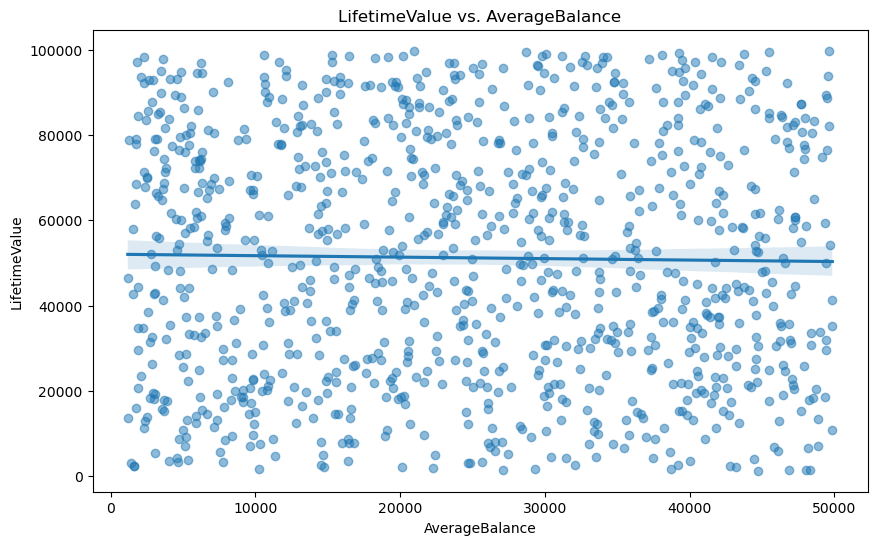

In [15]:
# Scatter plot: LifetimeValue vs. AverageBalance
plot_scatter_with_regression(df_featured, 'AverageBalance', 'LifetimeValue')

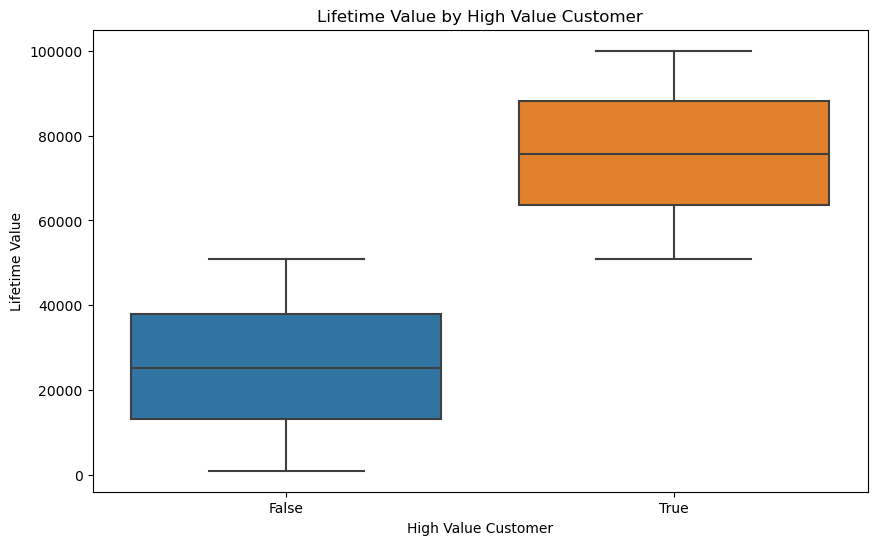

In [16]:
# Box plot: LifetimeValue by HighValueCustomer
plt.figure(figsize=(10, 6))
sns.boxplot(x='HighValueCustomer', y='LifetimeValue', data=df_featured)
plt.title('Lifetime Value by High Value Customer')
plt.xlabel('High Value Customer')
plt.ylabel('Lifetime Value')
plt.show()

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [18]:
# Select features for clustering
features = ['Age', 'IncomeLevel', 'AverageBalance', 'TransactionVolume', 
            'DepositPatterns', 'SpendingPatterns', 'RevenueContribution', 
            'CostToServe', 'LifetimeValue', 'NumberOfAccounts']
# Scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_featured[features])

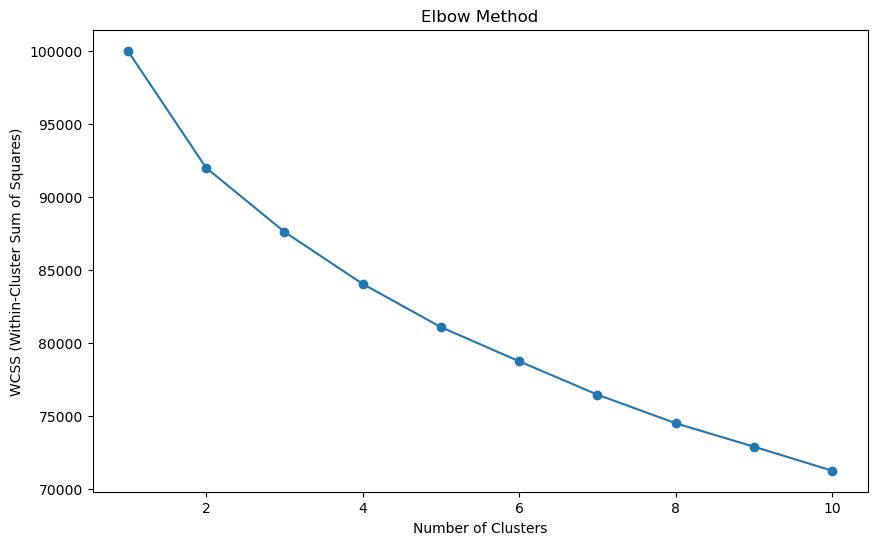

In [19]:
# Function to plot the elbow method
def plot_elbow_method(data, max_k):
    wcss = []
    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=1)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_k+1), wcss, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
    plt.show()

# Determine the optimal number of clusters using the elbow method
plot_elbow_method(scaled_features, 10)

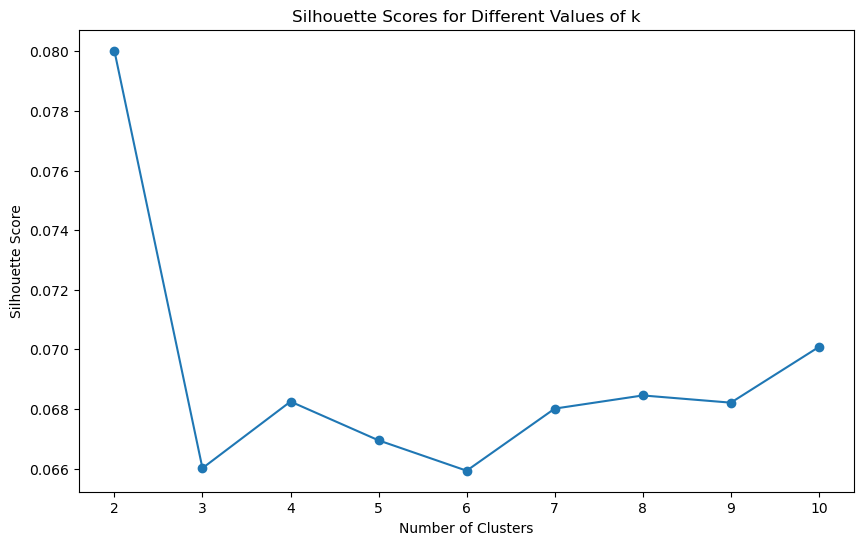

In [20]:
# Function to calculate silhouette scores for different values of k
def calculate_silhouette_scores(data, max_k):
    silhouette_scores = []
    for k in range(2, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=1)
        labels = kmeans.fit_predict(data)
        silhouette_scores.append(silhouette_score(data, labels))
    plt.figure(figsize=(10, 6))
    plt.plot(range(2, max_k+1), silhouette_scores, marker='o')
    plt.title('Silhouette Scores for Different Values of k')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.show()

# Calculate silhouette scores
calculate_silhouette_scores(scaled_features, 10)

In [22]:
# Choose K based on the elbow method (for example, K=4)
k = 2

# Fit K-means clustering with chosen K
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)

# Evaluate clustering with silhouette score
silhouette_avg = silhouette_score(scaled_features, cluster_labels)
print(f"Silhouette Score for K={k}: {silhouette_avg}")

# Add cluster labels to the original DataFrame
df_featured['Cluster'] = cluster_labels


Silhouette Score for K=2: 0.08002062685095578


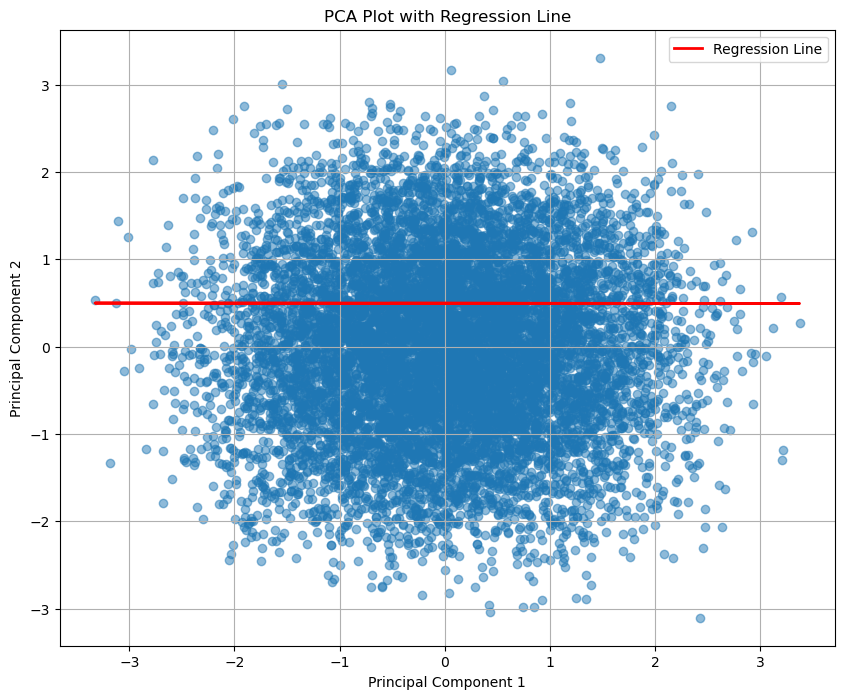

In [23]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

# Perform PCA
pca = PCA(n_components=2)  # You can choose the number of principal components to visualize
principal_components = pca.fit_transform(scaled_features)

# Create a DataFrame for the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Optional: Add cluster labels to the principal components DataFrame if available
principal_df['Cluster'] = cluster_labels  # Assuming 'cluster_labels' is available

# Perform linear regression using PCA components and a target variable (example)
# Example target variable (replace with your actual target variable)
target_variable = np.random.rand(len(principal_df))

# Fit linear regression model
regression_model = LinearRegression()
regression_model.fit(principal_df[['PC1']], target_variable)

# Predict target variable based on PC1
target_predicted = regression_model.predict(principal_df[['PC1']])

# Plot PCA components with regression line
plt.figure(figsize=(10, 8))
plt.scatter(principal_df['PC1'], principal_df['PC2'], alpha=0.5)
plt.plot(principal_df['PC1'], target_predicted, color='red', linewidth=2, label='Regression Line')
plt.title('PCA Plot with Regression Line')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
# Identify profitable clusters based on business metrics (e.g., Lifetime Value)
# Example: Calculate average Lifetime Value for each cluster
avg_ltv = df_featured.groupby('Cluster')['LifetimeValue'].mean()
avg_ltv

Cluster
0    50935.485771
1    50390.774070
Name: LifetimeValue, dtype: float64

In [25]:
# Example: Calculate average metrics for each cluster
metrics_to_average = features
avg_metrics = df_featured.groupby('Cluster')[metrics_to_average].mean()

print("Average Metrics by Cluster:")
print(avg_metrics)

Average Metrics by Cluster:
               Age   IncomeLevel  AverageBalance  TransactionVolume  \
Cluster                                                               
0        43.245174  84831.907065    25277.754428         255.437214   
1        43.836583  84493.188543    25421.488040         250.277186   

         DepositPatterns  SpendingPatterns  RevenueContribution  CostToServe  \
Cluster                                                                        
0            5053.625672       5088.886965         10061.231045  2491.529552   
1            5130.428141       5093.922211         10120.602010  2544.451055   

         LifetimeValue  NumberOfAccounts  
Cluster                                   
0         50935.485771          1.494925  
1         50390.774070          3.495075  


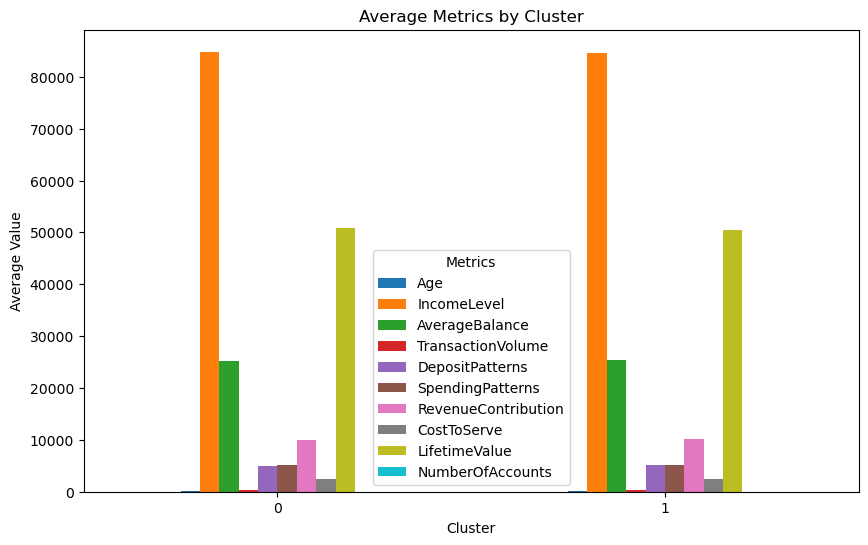

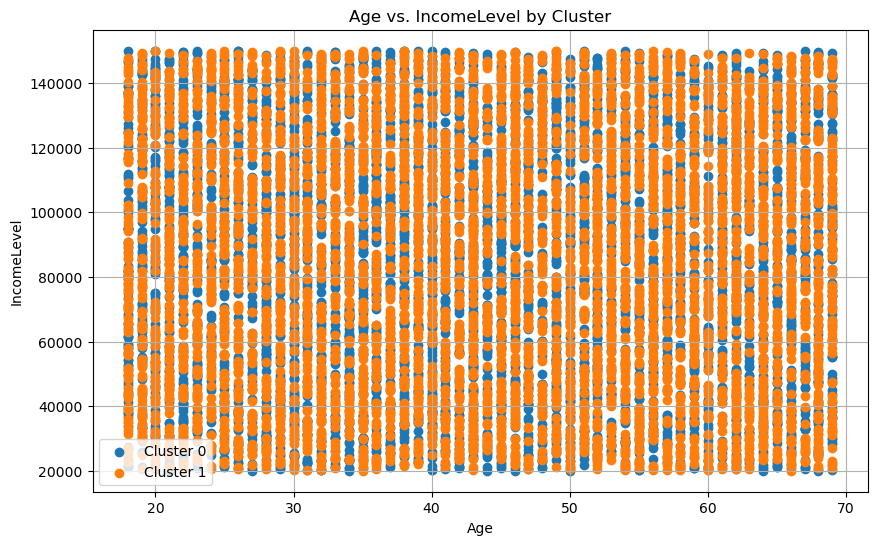

In [26]:
import matplotlib.pyplot as plt

# Example: Bar plot of average metrics by cluster
avg_metrics.plot(kind='bar', figsize=(10, 6))
plt.title('Average Metrics by Cluster')
plt.ylabel('Average Value')
plt.xticks(rotation=0)
plt.legend(title='Metrics')
plt.show()

# Example: Scatter plot of Age vs. IncomeLevel colored by Cluster
plt.figure(figsize=(10, 6))
for cluster, data in df_featured.groupby('Cluster'):
    plt.scatter(data['Age'], data['IncomeLevel'], label=f'Cluster {cluster}')
plt.title('Age vs. IncomeLevel by Cluster')
plt.xlabel('Age')
plt.ylabel('IncomeLevel')
plt.legend()
plt.grid(True)
plt.show()


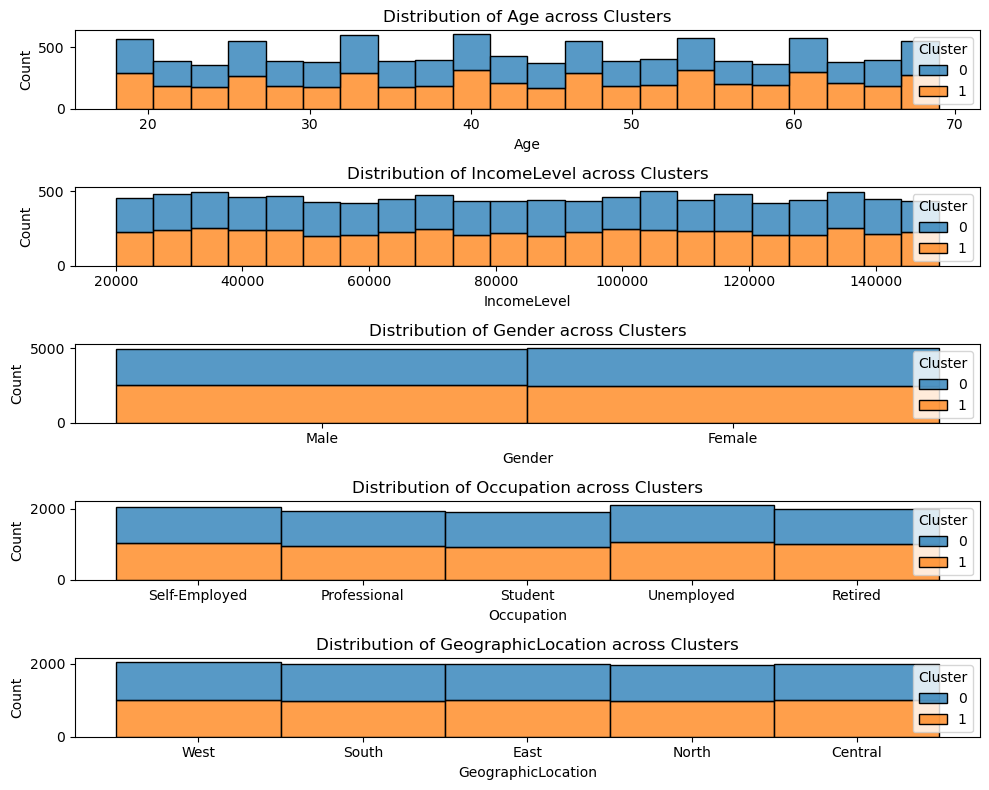

In [27]:
# Analyze demographic variables
demographic_vars = ['Age', 'IncomeLevel', 'Gender', 'Occupation', 'GeographicLocation']

# Visualize distributions within each cluster
fig, axes = plt.subplots(nrows=len(demographic_vars), ncols=1, figsize=(10, 8))
for i, var in enumerate(demographic_vars):
    sns.histplot(data=df_featured, x=var, hue='Cluster', multiple='stack', ax=axes[i])
    axes[i].set_title(f'Distribution of {var} across Clusters')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Count')
plt.tight_layout()
plt.show()

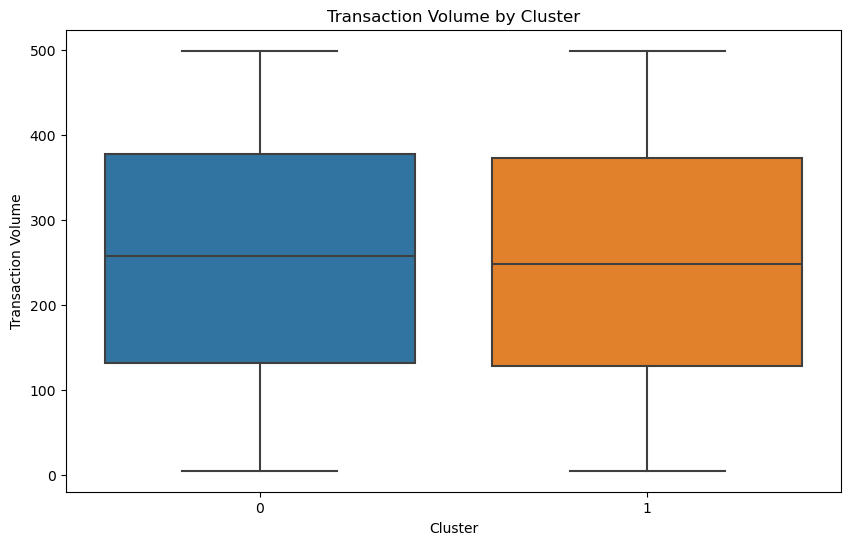

In [28]:
# Explore behavioral variables
behavioral_vars = ['TransactionVolume', 'DepositPatterns', 'SpendingPatterns', 'ChannelUsage', 'EngagementFrequency']

# Boxplot or violin plot to visualize behavioral patterns
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='TransactionVolume', data=df_featured)
plt.title('Transaction Volume by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Transaction Volume')
plt.show()

In [29]:
# Filter customers in Cluster 1
cluster_1_customers = df_featured[df_featured['Cluster'] == 1]

# Extract CustomerID and other relevant information
customer_ids = cluster_1_customers['CustomerID']
# You can add more columns as needed, e.g., Age, IncomeLevel, etc.

# Print or use the customer IDs
print("Customer IDs in Cluster 1 (High-Revenue Customers):")
print(customer_ids)

# Example: Output more information about these customers
print("Details of customers in Cluster 1:")
print(cluster_1_customers[['CustomerID', 'Age', 'IncomeLevel', 'RevenueContribution', 'LifetimeValue']])

Customer IDs in Cluster 1 (High-Revenue Customers):
5           6
12         13
14         15
15         16
17         18
        ...  
9986     9987
9987     9988
9994     9995
9998     9999
9999    10000
Name: CustomerID, Length: 4975, dtype: int64
Details of customers in Cluster 1:
      CustomerID  Age  IncomeLevel  RevenueContribution  LifetimeValue
5              6   25        55572                10080          56130
12            13   41        49011                16964          92664
14            15   57        54764                 1396          81718
15            16   41       117540                 7548          10584
17            18   39        44064                 8195          52616
...          ...  ...          ...                  ...            ...
9986        9987   23        64493                 1698          44164
9987        9988   68        92417                10748          81736
9994        9995   41       134267                11501          36296
9998

In [30]:
# Export to CSV
cluster_1_customers.to_csv('cluster_1_customers.csv', index=False)


In [31]:
df_featured.columns

Index(['CustomerID', 'Age', 'Gender', 'IncomeLevel', 'Occupation',
       'GeographicLocation', 'AccountType', 'NumberOfAccounts',
       'AverageBalance', 'TransactionVolume', 'DepositPatterns',
       'SpendingPatterns', 'ChannelUsage', 'EngagementFrequency',
       'ServiceUsage', 'RevenueContribution', 'CostToServe', 'LifetimeValue',
       'ChurnRate', 'CreditScore', 'LoanRepaymentHistory', 'DebtToIncomeRatio',
       'AgeGroup', 'IncomeGroup', 'HighValueCustomer',
       'TransactionToBalanceRatio', 'DebtToIncomeCategory',
       'ChurnRiskCategory', 'Cluster'],
      dtype='object')

In [32]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, f_oneway, chi2_contingency

# Example: Conduct t-tests for numerical variables (e.g., Age, IncomeLevel) between clusters
cluster_0 = df_featured[df_featured['Cluster'] == 0]
cluster_1 = df_featured[df_featured['Cluster'] == 1]

numeric_vars = ['Age', 'IncomeLevel', 'LifetimeValue', 'NumberOfAccounts', 'AverageBalance', 'TransactionVolume', 'DepositPatterns',
       'SpendingPatterns', 'RevenueContribution', 'CostToServe', ]  # Add more variables as needed

for var in numeric_vars:
    t_stat, p_val = ttest_ind(cluster_0[var], cluster_1[var])
    print(f"T-test for {var}: t-statistic = {t_stat}, p-value = {p_val}")

T-test for Age: t-statistic = -1.9833107037426578, p-value = 0.047360048213307776
T-test for IncomeLevel: t-statistic = 0.4495435243708357, p-value = 0.6530493630062596
T-test for LifetimeValue: t-statistic = 0.9444096231018763, p-value = 0.34498318719325816
T-test for NumberOfAccounts: t-statistic = -200.0025005469385, p-value = 0.0
T-test for AverageBalance: t-statistic = -0.5088186799321339, p-value = 0.6108905524090922
T-test for TransactionVolume: t-statistic = 1.8171048500811957, p-value = 0.06923098411307634
T-test for DepositPatterns: t-statistic = -1.3356044027915162, p-value = 0.18170901369886464
T-test for SpendingPatterns: t-statistic = -0.08811484811364671, p-value = 0.9297871599465186
T-test for RevenueContribution: t-statistic = -0.5144225347737889, p-value = 0.6069679778952313
T-test for CostToServe: t-statistic = -1.8739410437444037, p-value = 0.06096769370625291


### Age:

#### Result: t-statistic = -1.98, p-value = 0.047
Interpretation: There is a statistically significant difference in Age between the clusters. The negative t-statistic indicates that Cluster 1 tends to have younger customers compared to Cluster 0.

### IncomeLevel:

#### Result: t-statistic = 0.45, p-value = 0.653
Interpretation: There is no significant difference in IncomeLevel between the clusters. The p-value is greater than 0.05, indicating that any observed difference in means could likely be due to random chance.

### LifetimeValue:

#### Result: t-statistic = 0.94, p-value = 0.345
Interpretation: There is no significant difference in LifetimeValue between the clusters. The p-value suggests that differences observed in average LifetimeValue are not statistically significant.

### AverageBalance:

#### Result: t-statistic = -0.51, p-value = 0.611
Interpretation: There is no significant difference in AverageBalance between the clusters. Similar to IncomeLevel, the p-value is high, indicating that observed differences are not likely due to true differences between clusters.

### DepositPatterns, SpendingPatterns, RevenueContribution, CostToServe:

#### Results: These variables show no significant differences between the clusters based on their respective t-statistics and p-values.

Chi-square test for Gender: Chi2 = 2.950967743500856, p-value = 0.08582614963631136
Chi-square test for GeographicLocation: Chi2 = 1.979741392826766, p-value = 0.7394851808395368
Chi-square test for Occupation: Chi2 = 4.205955180436695, p-value = 0.3788498120350415
Chi-square test for ChannelUsage: Chi2 = 0.14434296334949098, p-value = 0.930371340495587


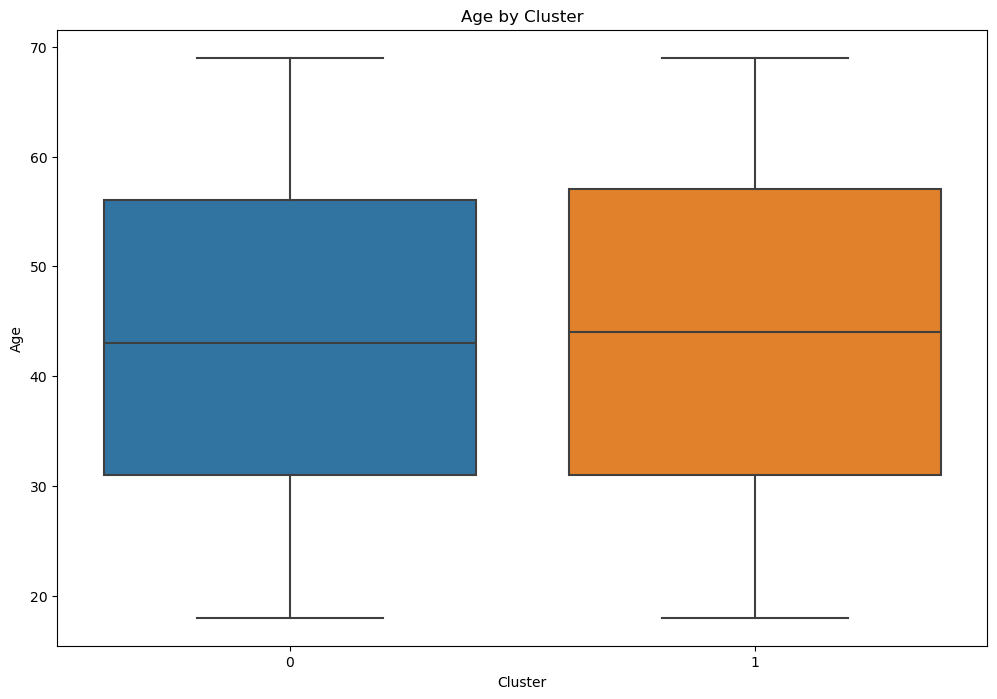

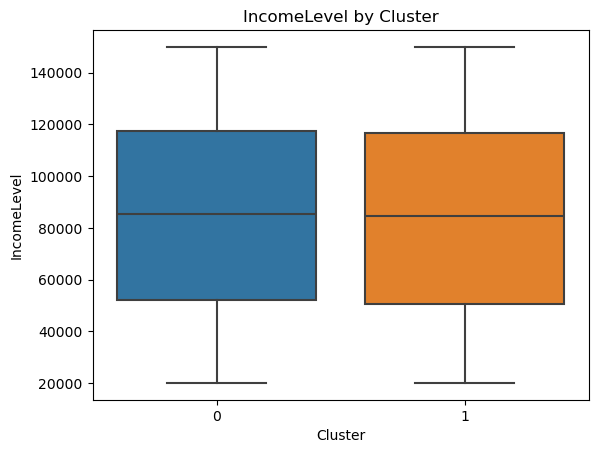

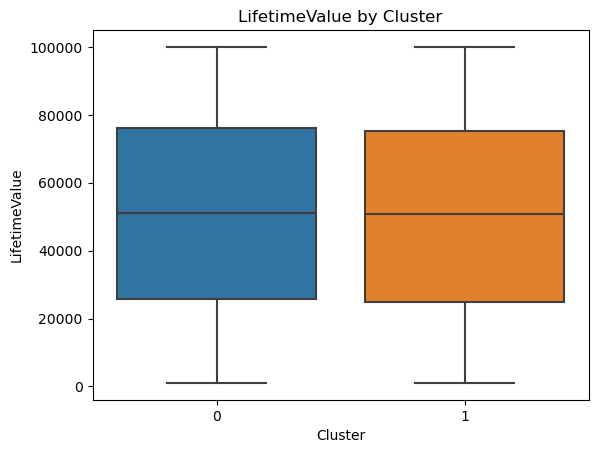

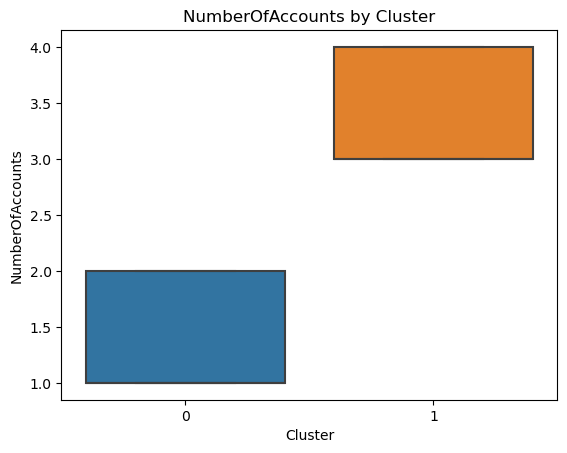

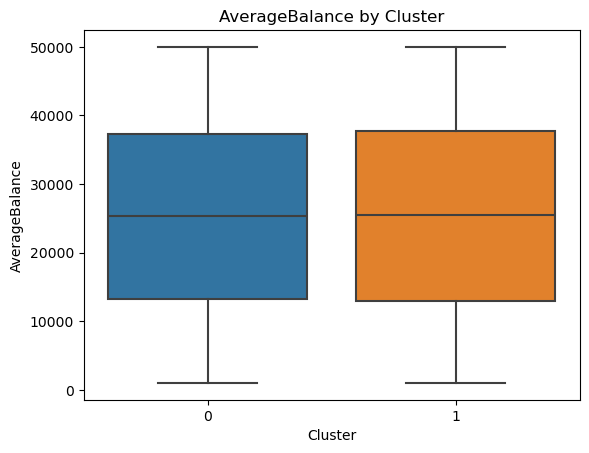

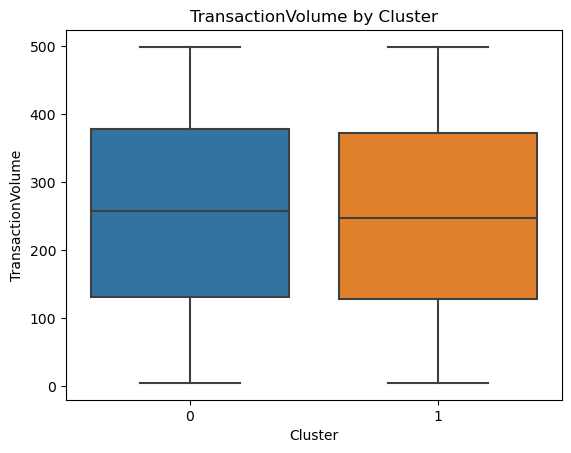

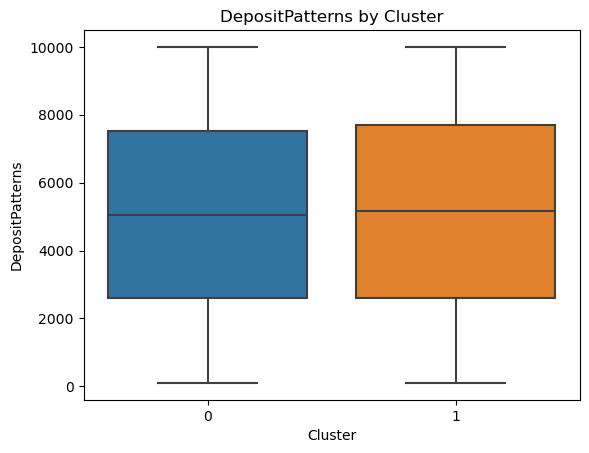

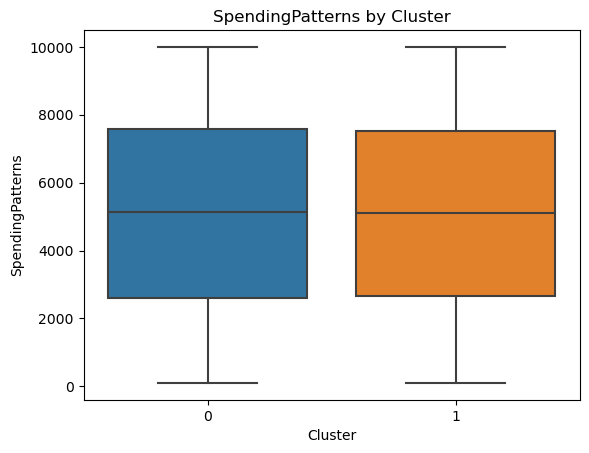

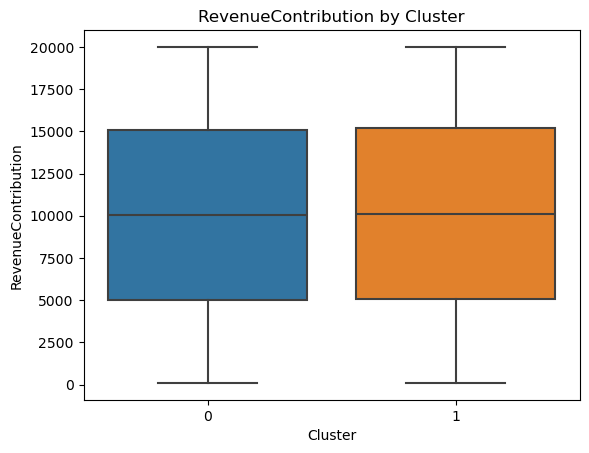

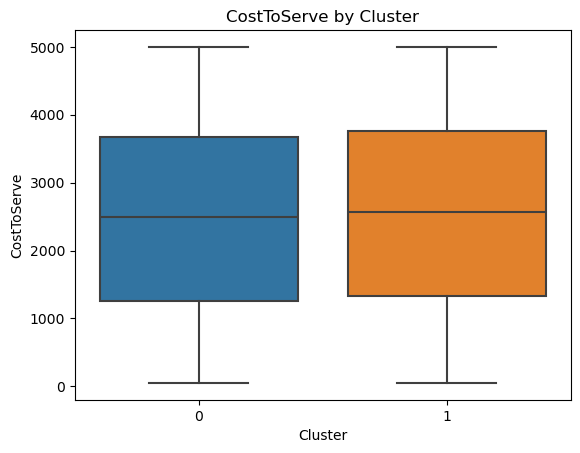

In [33]:
# Example: Conduct chi-square tests for categorical variables (e.g., Gender, GeographicLocation)
categorical_vars = ['Gender', 'GeographicLocation', 'Occupation', 'ChannelUsage']  # Add more variables as needed

for var in categorical_vars:
    contingency_table = pd.crosstab(df_featured[var], df_featured['Cluster'])
    chi2, p_val, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-square test for {var}: Chi2 = {chi2}, p-value = {p_val}")

# Example: Visualize differences using box plots for numerical variables
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
for var in numeric_vars:
    sns.boxplot(x='Cluster', y=var, data=df_featured)
    plt.title(f'{var} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(var)
    plt.show()

### Gender:

#### Result: Chi2 = 2.95, p-value = 0.086
Interpretation: There is no significant association between Gender and Clusters. The p-value is greater than 0.05, indicating that gender distribution does not vary significantly across clusters.

### GeographicLocation, Occupation, ChannelUsage:

#### Results: These variables also show no significant associations with Clusters based on their respective Chi-square statistics and p-values.

## Summary
### Significant Differences: Age show statistically significant differences between clusters.
### Non-Significant Differences: IncomeLevel, LifetimeValue, AverageBalance, TransactionVolume, and categorical variables (Gender, GeographicLocation, Occupation, ChannelUsage) do not show significant differences between clusters.

In [37]:
# Ensure that only numeric columns are used for the mean calculation
numeric_cols = df_featured.select_dtypes(include='number').columns.tolist()

# Perform groupby and calculate mean for only numeric columns
age_group_analysis = df_featured.groupby(['Cluster', 'AgeGroup'])[numeric_cols].mean()

# Display the result
print(age_group_analysis)

                   CustomerID        Age   IncomeLevel  NumberOfAccounts  \
Cluster AgeGroup                                                           
0       18-30     4995.709733  24.551249  86052.240310          1.498708   
        31-40     5235.970958  35.597289  83700.842207          1.507260   
        41-50     4871.756477  45.427979  84182.166839          1.513990   
        51-60     4938.609031  55.305066  84584.626652          1.471366   
        61-70     4973.900807  64.980392  85952.696655          1.477509   
1       18-30     5052.240036  24.417572  84386.811594          3.499094   
        31-40     4973.128286  35.563617  85211.588854          3.463722   
        41-50     5016.498446  45.401036  84513.000000          3.488083   
        51-60     5035.957619  55.455096  83467.591322          3.497477   
        61-70     4912.922551  64.912301  85099.185649          3.531891   

                  AverageBalance  TransactionVolume  DepositPatterns  \
Cluster AgeGrou

## General Observations
### Cluster 0 tends to have fewer accounts per customer and a lower engagement frequency compared to Cluster 1. The average income and balance levels are slightly lower, but the lifetime value is higher, indicating potentially more loyal customers.

### Cluster 1 has higher engagement frequency and more accounts per customer, suggesting more active customers. However, the churn rates are also slightly higher, especially in the older age groups.

In [49]:
# Fill NaN values in the AgeGroup column with 'Unknown'
df_featured['AgeGroup'] = df_featured['AgeGroup'].fillna('Unknown')

# Define the campaign messages with all possible age groups
campaign_messages = {
    'Unknown': {
        'message': 'Default message for unknown age group',
        'channels': ['Unknown']
    },
    '18-30': {
        'message': 'Highlighting student loans, first-time homebuyer programs, or digital banking services',
        'channels': ['Social Media', 'Mobile Apps', 'Online Platforms']
    },
    '31-40': {
        'message': 'Focus on investment opportunities, retirement planning, and mortgage products',
        'channels': ['Email', 'Online Platforms', 'In-Person Consultations']
    },
    '41-50': {
        'message': 'Emphasize healthcare-related financial products, estate planning, and wealth management services',
        'channels': ['Traditional Media', 'Phone Calls', 'In-Person Visits']
    },
    '51-60': {
        'message': 'Emphasize healthcare-related financial products, estate planning, and wealth management services',
        'channels': ['Traditional Media', 'Phone Calls', 'In-Person Visits']
    },
    '61-70': {
        'message': 'Emphasize healthcare-related financial products, estate planning, and wealth management services',
        'channels': ['Traditional Media', 'Phone Calls', 'In-Person Visits']
    }
}


In [50]:
# Create a function to determine preferred communication channels for each age group
def get_communication_channels(age_group):
    return campaign_messages[age_group]['channels']

# Apply the function to the DataFrame
df_featured['PreferredChannels'] = df_featured['AgeGroup'].apply(lambda x: get_communication_channels(str(x)))


In [52]:
df_featured['PreferredChannels'].head()

0    [Traditional Media, Phone Calls, In-Person Vis...
1    [Traditional Media, Phone Calls, In-Person Vis...
2    [Traditional Media, Phone Calls, In-Person Vis...
3    [Email, Online Platforms, In-Person Consultati...
4    [Traditional Media, Phone Calls, In-Person Vis...
Name: PreferredChannels, dtype: object

In [53]:
df_featured.head()

,CustomerID,Age,Gender,IncomeLevel,Occupation,GeographicLocation,AccountType,NumberOfAccounts,AverageBalance,TransactionVolume,...,LoanRepaymentHistory,DebtToIncomeRatio,AgeGroup,IncomeGroup,HighValueCustomer,TransactionToBalanceRatio,DebtToIncomeCategory,ChurnRiskCategory,Cluster,PreferredChannels
0,1,56,Male,129952,Self-Employed,West,Savings,1,26443,157,...,Good,0.876077,51-60,100K-150K,False,0.005937,81-100%,Very High,0,"[Traditional Media, Phone Calls, In-Person Vis..."
1,2,69,Female,74235,Professional,South,Savings,2,2382,369,...,Average,0.885997,61-70,60K-80K,True,0.154912,81-100%,Medium,0,"[Traditional Media, Phone Calls, In-Person Vis..."
2,3,46,Female,78565,Self-Employed,East,Savings,2,20998,200,...,Good,0.647359,41-50,60K-80K,True,0.009525,61-80%,High,0,"[Traditional Media, Phone Calls, In-Person Vis..."
3,4,32,Female,75342,Self-Employed,East,Checking,2,28438,19,...,Poor,0.562958,31-40,60K-80K,True,0.000668,41-60%,Medium,0,"[Email, Online Platforms, In-Person Consultati..."
4,5,60,Male,62723,Student,North,Checking,2,24479,214,...,Average,0.553886,51-60,60K-80K,False,0.008742,41-60%,Very High,0,"[Traditional Media, Phone Calls, In-Person Vis..."


In [57]:
# Define the function to determine content type for each age group
def get_content_type(age_group):
    if age_group == '18-30':
        return "Educational content on financial literacy."
    elif age_group == '31-40':
        return "Articles on investment strategies."
    elif age_group == '41-50':
        return "Guides on retirement planning."
    elif age_group == '51-60':
        return "Guides on estate planning."
    elif age_group == '61-70':
        return "Healthcare finance articles."
    else:
        return "General content."

# Apply the function to the DataFrame
df_featured['ContentType'] = df_featured['AgeGroup'].apply(lambda x: get_content_type(str(x)))

# Display the updated DataFrame
print(df_featured[['AgeGroup', 'ContentType']].head())


  AgeGroup                         ContentType
0    51-60          Guides on estate planning.
1    61-70        Healthcare finance articles.
2    41-50      Guides on retirement planning.
3    31-40  Articles on investment strategies.
4    51-60          Guides on estate planning.


In [59]:
# Define example actions for marketing campaigns
def run_campaign(age_group):
    if age_group == '18-30':
        print("Running social media ads highlighting student loan programs.")
        print("Offering incentives for using mobile banking apps.")
    elif age_group == '31-40':
        print("Sending personalized emails about investment opportunities and mortgage offers.")
        print("Hosting webinars on retirement planning.")
    elif age_group == '41-50':
        print("Placing ads in traditional media about estate planning services.")
        print("Organizing community events focused on healthcare finance.")
    elif age_group == '51-60':
        print("Placing ads in traditional media about estate planning services.")
        print("Organizing community events focused on healthcare finance.")
    elif age_group == '61-70':
        print("Placing ads in traditional media about estate planning services.")
        print("Organizing community events focused on healthcare finance.")
    else:
        return "General Content"

# Run campaigns for each age group
for age_group in df_featured['AgeGroup'].unique():
    print(f"Campaigns for Age Group {age_group}:")
    run_campaign(age_group)
    print()


Campaigns for Age Group 51-60:
Placing ads in traditional media about estate planning services.
Organizing community events focused on healthcare finance.

Campaigns for Age Group 61-70:
Placing ads in traditional media about estate planning services.
Organizing community events focused on healthcare finance.

Campaigns for Age Group 41-50:
Placing ads in traditional media about estate planning services.
Organizing community events focused on healthcare finance.

Campaigns for Age Group 31-40:
Sending personalized emails about investment opportunities and mortgage offers.
Hosting webinars on retirement planning.

Campaigns for Age Group 18-30:
Running social media ads highlighting student loan programs.
Offering incentives for using mobile banking apps.

Campaigns for Age Group Unknown:



In [61]:
# Example performance metrics for tracking (dummy data)
performance_metrics = {
    '18-30': {'engagement_rate': 0.5, 'conversion_rate': 0.1, 'customer_feedback': 4.5},
    '31-40': {'engagement_rate': 0.6, 'conversion_rate': 0.15, 'customer_feedback': 4.2},
    '41-50': {'engagement_rate': 0.4, 'conversion_rate': 0.2, 'customer_feedback': 4.8},
    '51-60': {'engagement_rate': 0.4, 'conversion_rate': 0.2, 'customer_feedback': 4.8},
    '61-70': {'engagement_rate': 0.4, 'conversion_rate': 0.2, 'customer_feedback': 4.8}
}

# Function to adjust strategies based on performance
def adjust_strategy(age_group, metrics):
    if metrics['engagement_rate'] < 0.5:
        print(f"Increase social media presence for Age Group {age_group}.")
    if metrics['conversion_rate'] < 0.1:
        print(f"Revise call-to-action for Age Group {age_group}.")
    if metrics['customer_feedback'] < 4.0:
        print(f"Improve customer service for Age Group {age_group}.")

# Adjust strategies for each age group
for age_group, metrics in performance_metrics.items():
    print(f"Adjustments for Age Group {age_group}:")
    adjust_strategy(age_group, metrics)
    print()


Adjustments for Age Group 18-30:

Adjustments for Age Group 31-40:

Adjustments for Age Group 41-50:
Increase social media presence for Age Group 41-50.

Adjustments for Age Group 51-60:
Increase social media presence for Age Group 51-60.

Adjustments for Age Group 61-70:
Increase social media presence for Age Group 61-70.



In [62]:
# Save the DataFrame to a CSV file
df_featured.to_csv('segmentation_analysis.csv', index=False)

In [63]:
df_featured.columns

Index(['CustomerID', 'Age', 'Gender', 'IncomeLevel', 'Occupation',
       'GeographicLocation', 'AccountType', 'NumberOfAccounts',
       'AverageBalance', 'TransactionVolume', 'DepositPatterns',
       'SpendingPatterns', 'ChannelUsage', 'EngagementFrequency',
       'ServiceUsage', 'RevenueContribution', 'CostToServe', 'LifetimeValue',
       'ChurnRate', 'CreditScore', 'LoanRepaymentHistory', 'DebtToIncomeRatio',
       'AgeGroup', 'IncomeGroup', 'HighValueCustomer',
       'TransactionToBalanceRatio', 'DebtToIncomeCategory',
       'ChurnRiskCategory', 'Cluster', 'PreferredChannels', 'ContentType'],
      dtype='object')

In [68]:
df_exploded = df_featured.explode('PreferredChannels')

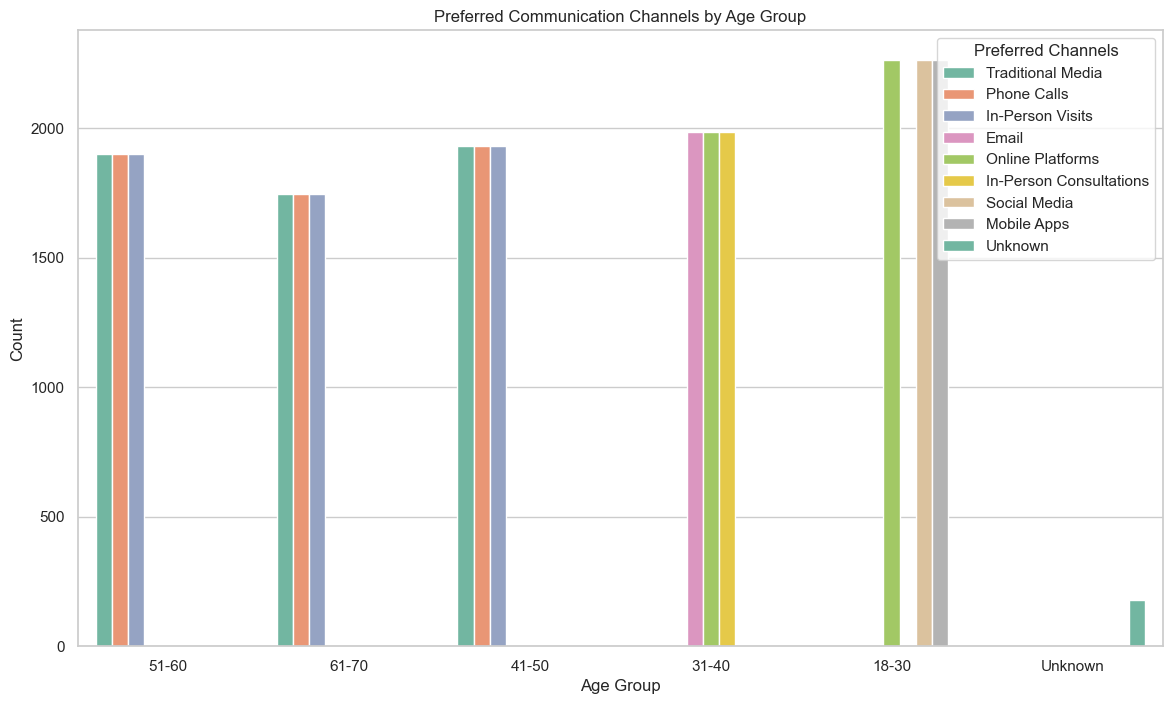

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Plot 1: Count of Preferred Channels by AgeGroup and Cluster
plt.figure(figsize=(14, 8))
sns.countplot(data=df_exploded, x='AgeGroup', hue='PreferredChannels', palette='Set2')
plt.title('Preferred Communication Channels by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Preferred Channels')
plt.show()

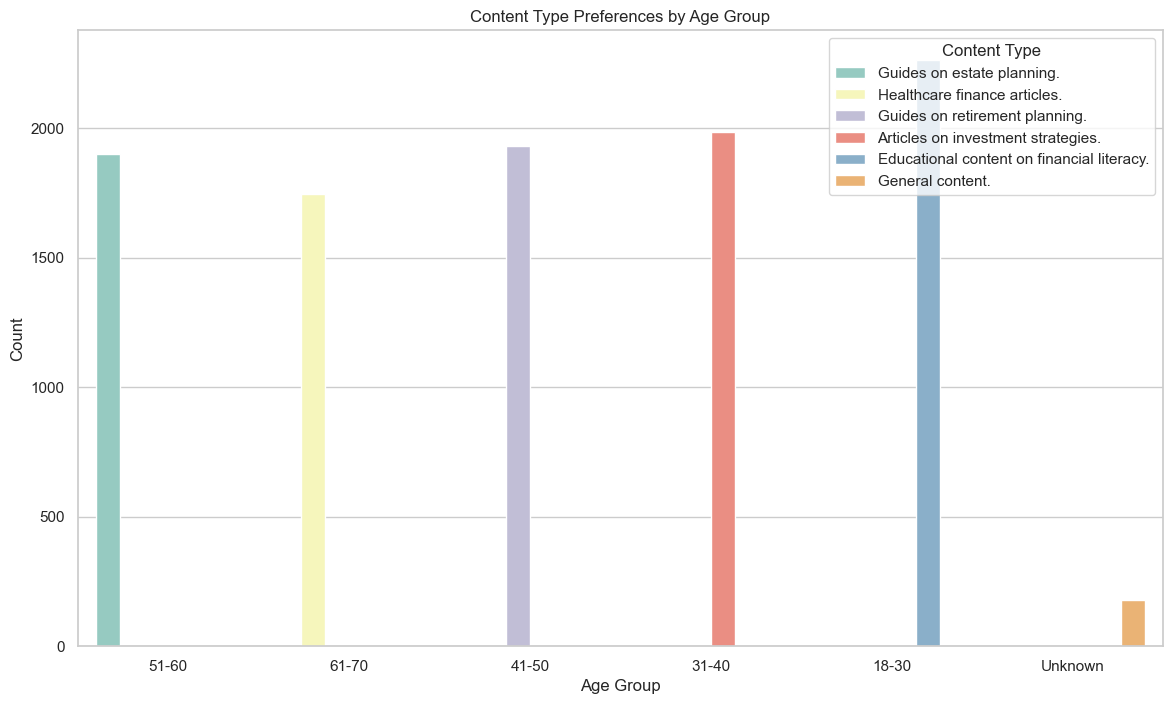

In [71]:
# Plot 2: Distribution of ContentType by AgeGroup
plt.figure(figsize=(14, 8))
sns.countplot(data=df_featured, x='AgeGroup', hue='ContentType', palette='Set3')
plt.title('Content Type Preferences by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Content Type')
plt.show()



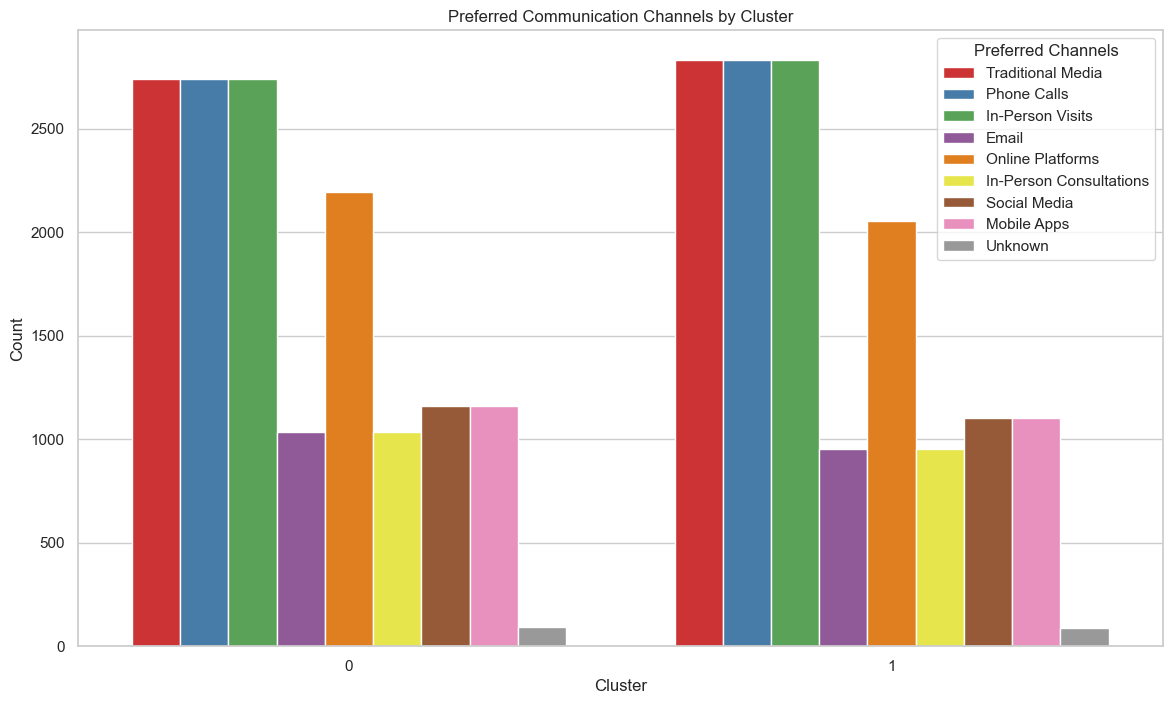

In [73]:
# Plot 3: Count of Preferred Channels by Cluster
plt.figure(figsize=(14, 8))
sns.countplot(data=df_exploded, x='Cluster', hue='PreferredChannels', palette='Set1')
plt.title('Preferred Communication Channels by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Preferred Channels')
plt.show()

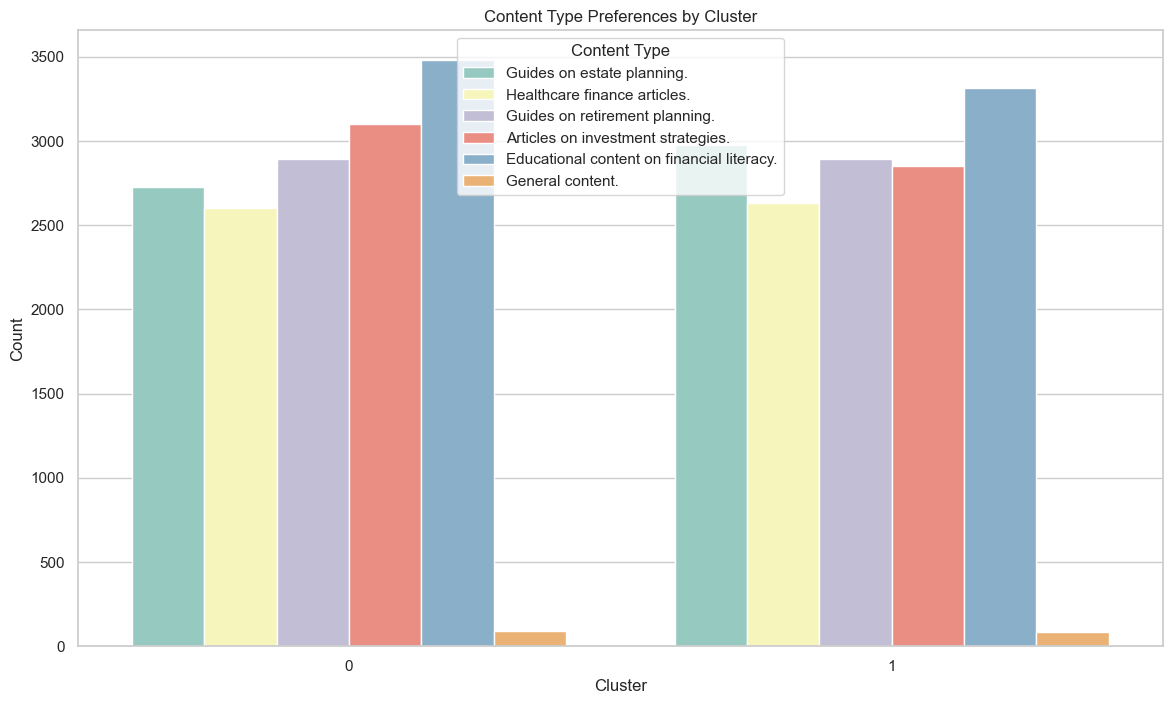

In [74]:
# Plot 4: Distribution of ContentType by Cluster
plt.figure(figsize=(14, 8))
sns.countplot(data=df_exploded, x='Cluster', hue='ContentType', palette='Set3')
plt.title('Content Type Preferences by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Content Type')
plt.show()
